<a href="https://colab.research.google.com/github/freehtet/Machine-Learning/blob/main/Wai_Yann_Htet_M504_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction

Compnay is receiving churned customers which impact on company's future profit and investment as reducing in customer can negatively impact to business and acquiring more customers can cost company. So, company want to understand the factors and reasons of why customers churned. After understanding the dataset, company want to prepare customer retentions strategies.

There are total 7043 entries and 38 columns.

Target(1):
1.   'Customer Status': customer is churned ( away from the company) or stay ( still using the company service)

Features(37):
1.   'Customer ID': customer ID
2.   'Gender': male or female
3.   'Age' : user's age
4.   'Married': user's martial status
5.   'Number of Dependents': number of dependents from customer
6.   'City' : user's based location
7.   'Zip Code': zip code of based location
8.   'Latitude' : latitude of based location
9.   'Longitude': longitude of based location
10.   'Number of Referrals': customer has referred a friend or family member
11.   'Tenure in Months': during of using service
12.   'Offer': last marketing offer that the customer accepted
13.   'Phone Service': subscription of home phone service
14.  'Avg Monthly Long Distance Charges': long distance charge
15.  'Multiple Lines': subscriptions of multiple phone lines
16.  'Internet Service': subscriptions of internet service
17.  'Internet Type':  internet connection-DSL, Fiber Optic, Cable
18.  'Avg Monthly GB Download': user's internet usage
19.  'Online Security': additional subscriptions on service
20.  'Online Backup': additional subscriptions on service
21.  'Device Protection Plan': additional subscriptions on service
22.  'Premium Tech Support': additional subscriptions on service
23.  'Streaming TV' : internet service to stream television
24.  'Streaming Movies': internet service to stream movies
25.  'Streaming Music': internet service to stream music
26.  'Unlimited Data': additional monthly fee to have unlimited data
27.  'Contract': current contract type
28.  'Paperless Billing': yes or no
29.  'Payment Method': pays their bill: Bank Withdrawal, Credit Card, others
30.  'Monthly Charge': total monthly charge
31.  'Total Charges': calculated to the end of the quarter
32.  'Total Refunds': calculated to the end of the quarter
33.  'Total Extra Data Charges': calculated to the end of the quarter
34.  'Total Long Distance Charges': calculated to the end of the quarter
35.  'Total Revenue': company's total revenue per customer (Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges)
36.  'Churn Category':high-level category for the customer's reason for leaving the company
37.  'Churn Reason':customer's specific reason for leaving the company


Data Source: https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics

#Business Questions

1.   To identify the overall impact of business impacted by churned customers.
2.   To identify which segments of customers ( based on revenue) have the higher churned rate.
3.   To investigate which kind of recent marketing offers customer like and which kind of offers customer disliked.
4.   To identify whether or not the user's age related to churn rate.
5.   To analyse the relations between churned rate vs service duration with the company.





#Importing libararies

In [ ]:
import folium
from folium.plugins import HeatMap

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from google.colab import files

# Uploading the file

In [ ]:
# uploaded = files.upload()

In [ ]:
df_org = pd.read_csv('Final_M504_telecom_customer_churn.csv')

Checking details of dataset

In [ ]:
print(df_org.shape)
print(df_org.info())

(7043, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-n

In [ ]:
df_org.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Copying original dataframe(df_org) to working data frame (df).

In [ ]:
df = df_org.copy()

Adding one more columns as 'is_churned' based on 'Customer Status' from categorical to numerical.

In [ ]:
df['is_churned'] = df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)

# Data preparation
Checking Missing Data

creating function to check missing data in %.

In [ ]:
def checking_missing_percent(df):
   percent_nan = 100* df.isnull().sum() / len(df)
   percent_nan = percent_nan[percent_nan > 0].sort_values()
   return percent_nan

In [ ]:
checking_missing_percent(df)

,0
Avg Monthly Long Distance Charges,9.683374
Multiple Lines,9.683374
Internet Type,21.666903
Avg Monthly GB Download,21.666903
Online Security,21.666903
Online Backup,21.666903
Device Protection Plan,21.666903
Premium Tech Support,21.666903
Streaming TV,21.666903
Streaming Movies,21.666903


As per above a analysis, a lot of churn realted data are missing because the missing customers are not chruned. As per following data cell. So that, decided to add 'None' to fill the data because these customers are not churned.

In [ ]:
df[['is_churned', 'Churn Category', 'Churn Reason']].groupby(['is_churned']).count()

,Churn Category,Churn Reason
is_churned,,
0,0,0
1,1869,1869


In [ ]:
df['Churn Category'] = df['Churn Category'].fillna('None')
df['Churn Reason'] = df['Churn Reason'].fillna('None')

Checking again for remaining missing data.

In [ ]:
checking_missing_percent(df)

,0
Avg Monthly Long Distance Charges,9.683374
Multiple Lines,9.683374
Internet Type,21.666903
Avg Monthly GB Download,21.666903
Online Security,21.666903
Online Backup,21.666903
Device Protection Plan,21.666903
Premium Tech Support,21.666903
Streaming TV,21.666903
Streaming Movies,21.666903


As per above analysis, the missing data in Offers are due to that customers are not subscribed to the latest marking offer and continue with 'Base Offer'. So that, decided to fill null with Base Offer.

In [ ]:
df['Offer'] = df['Offer'].fillna('Base Offer')

In [ ]:
df[['Internet Service', 'Internet Type']].groupby(['Internet Service']).count()

,Internet Type
Internet Service,
No,0
Yes,5517


for the others:
Internet type:  

*   'Internet type': fill null with None because customer doesn't have the internet service.
*   'Avg Monthly GB Download': fill the null data with 0.0 since customers doesn't have internet service.
*   Online Security', 'Online Backup', 'Device Protection Plan','Premium Tech Support','Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data': since these are additional service, null Data has been filled with None.
* 'Avg Monthly Long Distance Charges': fill the null data with 0.0 since no charges will be made for no called.
*  'Multiple Lines': fill the null data with No to multiple lines since customers have no phone service.




In [ ]:
df['Internet Type'] = df['Internet Type'].fillna('None')
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(0.0)
df[['Online Security', 'Online Backup', 'Device Protection Plan','Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']] = df[['Online Security', 'Online Backup', 'Device Protection Plan','Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']].fillna('None')

In [ ]:
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(0.0)

In [ ]:
df[['Phone Service', 'Avg Monthly Long Distance Charges','Multiple Lines' ]].groupby('Phone Service').sum()

,Avg Monthly Long Distance Charges,Multiple Lines
Phone Service,,
No,0.00,0
Yes,161699.91,NoYesNoNoNoNoNoYesNoYesYesNoYesYesYesNoYesYesY...


In [ ]:
df['Multiple Lines'] = df['Multiple Lines'].fillna('No')

Checking missing data

In [ ]:
if df.isnull().sum().sum() == 0:
  print('No missing cell')

No missing cell


#Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,is_churned
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,None,None,0
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,None,None,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,1


In [ ]:
#dropping customer ID
df.drop('Customer ID', axis= 1, inplace=True)

Finding the initial statical analysis of dataset.
As per following table,
*   Total number of customer: 7043.
*   Age: Average: 46 years old, min: 19 years old and max: 80 years old. Std: 16 years old.
*   Tenure in Months: Average: 32 months, min: 1 month and max: 72 months. Std: 24 months.
*   Total Revenue: Average: 3034, min: 21 and max: 11979. Std: 2865.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.000000,9.210000,22.890000,36.395000,49.990000
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.000000,3.000000,17.000000,27.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


The average of age of overall churned customers and active customers are not much different. There is only slightly variance as per below graph.

<Axes: xlabel='is_churned', ylabel='Age'>

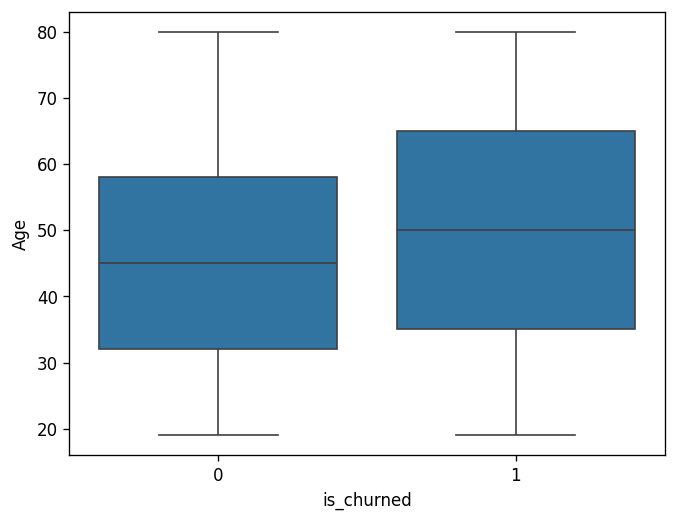

In [ ]:
plt.figure(dpi=120)
sns.boxplot(data=df, x='is_churned', y='Age' )

The average of total revenue for churned customer and active customers are quite differnet as active customers above 2000 and for churned customers are around 1500. However, there are outliners and extreme data points which have been churned. We should focus these customers for details interview for follow up.

<Axes: xlabel='is_churned', ylabel='Total Revenue'>

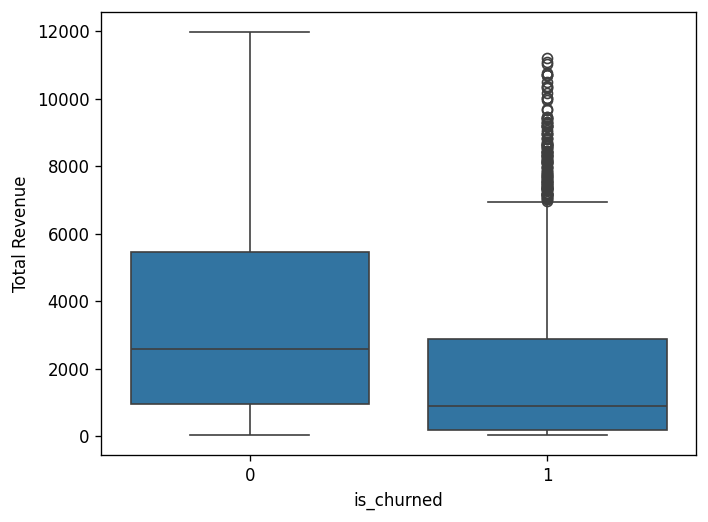

In [ ]:
plt.figure(dpi=120)
sns.boxplot(data=df, x='is_churned', y='Total Revenue' )

After finding the correlations, churned customers are negatively correlated with Tenure in Months. Meanwhile, Tenure in Months is strongly correlated with active customers.

In [ ]:
df.corr(numeric_only=True)[['is_churned','Total Revenue']]

,is_churned,Total Revenue
Age,0.115760,0.048265
Number of Dependents,-0.218780,0.038038
Zip Code,-0.016289,0.002944
Latitude,-0.041546,0.000082
Longitude,0.024052,0.001062
Number of Referrals,-0.286540,0.261853
Tenure in Months,-0.352861,0.853146
Avg Monthly Long Distance Charges,0.008120,0.232291
Avg Monthly GB Download,0.048868,0.180726
Monthly Charge,0.187833,0.563249


Adding visualization in map to see heat map

In [ ]:
california_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=7)

In [ ]:
heat_data = [[row['Latitude'],row['Longitude']] for index, row in df.iterrows()]

In [ ]:
HeatMap(heat_data, radius=15, blur=5).add_to(california_map)

In [ ]:
california_map

Providing list of top 10 cities by customers residency.
Los Angeles is highest with most customers. Followed by San Diego and San Jose.


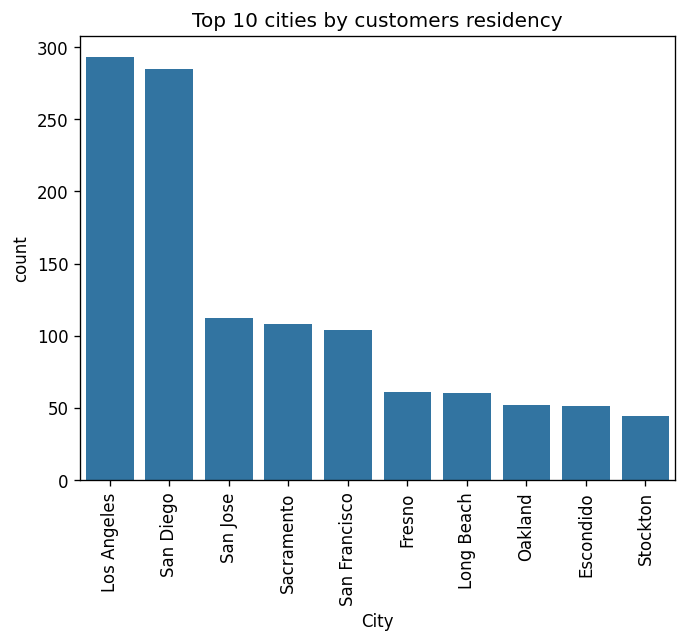

In [ ]:
plt.figure(dpi=120)
sns.barplot(df['City'].value_counts().sort_values(ascending=False)[0:10])
plt.xticks(rotation=90);
plt.title('Top 10 cities by customers residency');

Providing list of top 10 cities by customers total revenue.
Los Angeles is highest with most customers. Followed by San Diego and Sacramento.




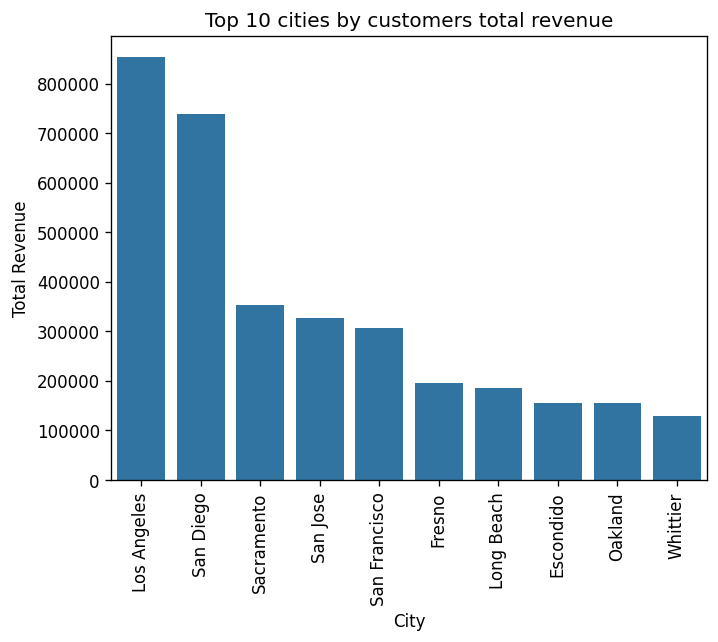

In [ ]:
plt.figure(dpi=120)
sns.barplot(df.groupby(['City'])['Total Revenue'].sum().sort_values(ascending=False)[0:10])
plt.xticks(rotation=90);
plt.title('Top 10 cities by customers total revenue');

Providing list of top 10 cities by avg revenue per customer.
Unsimiliar to above 2 findings, Del Mar is highest with most avg revenue per customer. Followed by Venice and Alamo.

In [ ]:
# Creating table to calculate avg spend by city.
joined = pd.merge(df['City'].value_counts(),df.groupby(['City'])['Total Revenue'].sum(), on='City', how='inner')
joined['per customer'] = joined['Total Revenue']/joined['count']

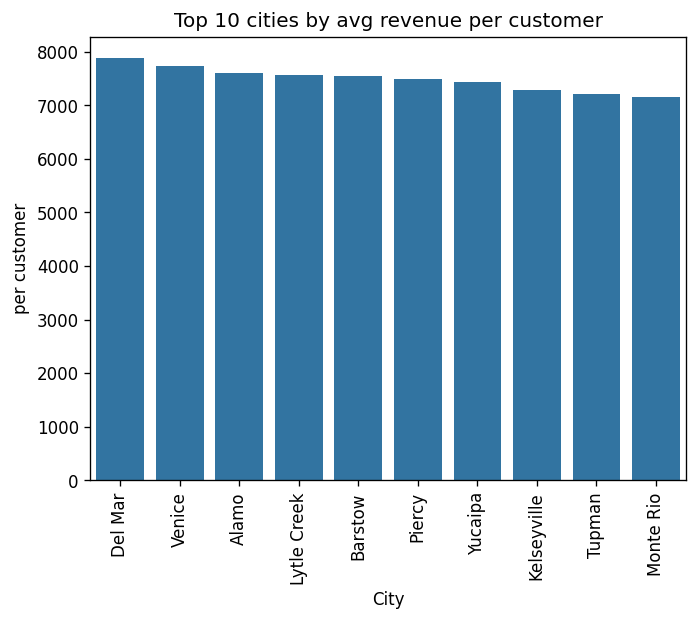

In [ ]:
plt.figure(dpi=120)
sns.barplot(joined['per customer'].sort_values(ascending=False)[0:10])
plt.xticks(rotation=90)
plt.title('Top 10 cities by avg revenue per customer');

To find of how many percent of customers has been churned overall.

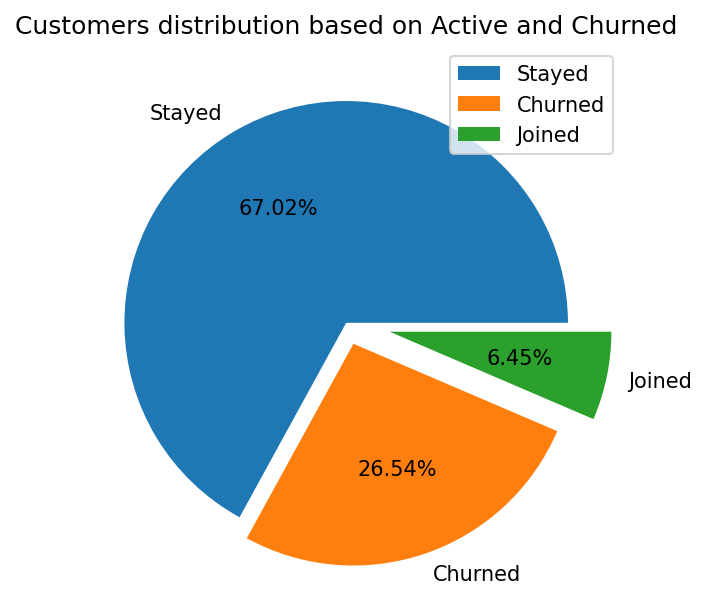

In [ ]:
plt.figure(dpi=150)
keys = df['Customer Status'].value_counts().index.to_list()
plt.pie(df['Customer Status'].value_counts(), labels=keys, explode=[0,0.1,.2], autopct='%.2f%%');
plt.legend(loc='best');
plt.title('Customers distribution based on Active and Churned');

In [ ]:
churn_rate = 100 * len(df[df['is_churned'] == 1])/ len(df)
print(f'Churned Rate: {churn_rate:.2f}%' )

Churned Rate: 26.54%


This functions has been created to calculate the churned related percentages instantly by providing dataframe or subset of it.

In [ ]:
def calculate_percent(df):
  return 100 * len(df[df['is_churned'] == 1])/ len(df)

# Business Question
# Q1. To identify the overall impact of business impacted by churned customers.

To find out the imapct on total revenue due to churn customers.

<Axes: >

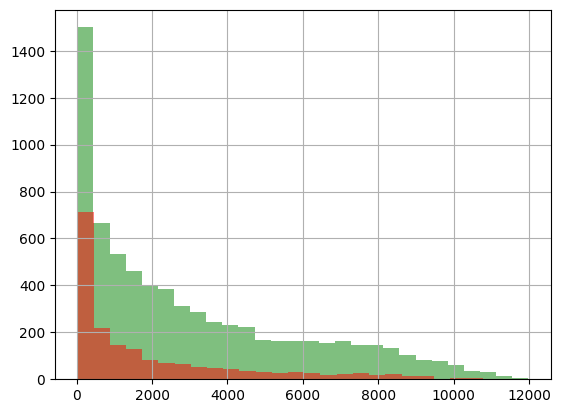

In [ ]:
df['Total Revenue'].hist(bins='auto', color = 'green', alpha=0.5)
df[df['is_churned'] == 1]['Total Revenue'].hist(bins='auto', color = 'red', alpha=0.5)

Finding the absoltute number on Overall Revenue, Revenue impacted by Churne and Net total revenue.

In [ ]:
display(f"Total overall revenue: {round(df['Total Revenue'].sum())}")
display(f"Total revenue by churned: {round(df[df['is_churned'] == 1]['Total Revenue'].sum())}")
display(f"Net total revenue : {round(df['Total Revenue'].sum()) - round(df[df['is_churned'] == 1]['Total Revenue'].sum())}")

'Total overall revenue: 21371132'

'Total revenue by churned: 3684460'

'Net total revenue : 17686672'

Creating pie chart for above data to summarized.

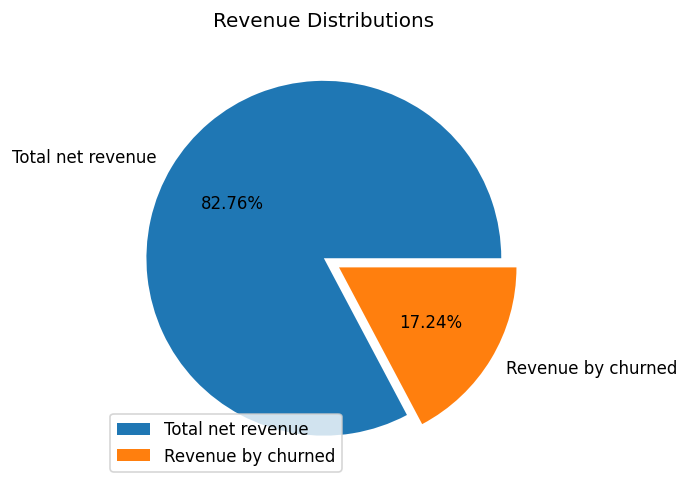

In [ ]:
plt.figure(dpi=120)
keys_rev = ['Total net revenue', 'Revenue by churned']
data_rev =  [round(df['Total Revenue'].sum()) - round(df[df['is_churned'] == 1]['Total Revenue'].sum()),round(df[df['is_churned'] == 1]['Total Revenue'].sum())]
plt.pie(data_rev, labels=keys_rev, explode=[0,0.1], autopct='%.2f%%');
plt.legend(loc='lower left');
plt.title('Revenue Distributions');

#Answer for Q1:
As per above analysis overall 17.24% of revenue has been impacted or having potential to be impacted in near future.

# Q2.To identify which segments of customers ( based on revenue) have the higher churned rate.

In order to create customer segment based on revenue. KMeans functions has used to create 5 clusters.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)

creating 'customer_segment' column with Kmean functions to have customers group based on Revenue.

In [ ]:
df['customer_segment']= kmeans.fit_predict(df['Total Revenue'].values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Checking which customer_segement is belong to which clusters.

In [ ]:
df[['customer_segment', 'Total Revenue']].groupby('customer_segment').mean()

,Total Revenue
customer_segment,
0,508.466218
1,4339.559908
2,6768.103647
3,2279.211500
4,9245.420713


Remaning numbers based clusters into text based as below:

In [ ]:
def change_segment(seg):
  if seg == 0:
    return '1.very low'
  elif seg == 3:
    return '2.low'
  elif seg == 1:
    return '3.average'
  elif seg == 2:
    return '4.high'
  elif seg == 4:
    return '5.very high'
df['customer_segment'] = df['customer_segment'].apply(change_segment)

Figuring out which which customer segment has more churned rate.

<Axes: >

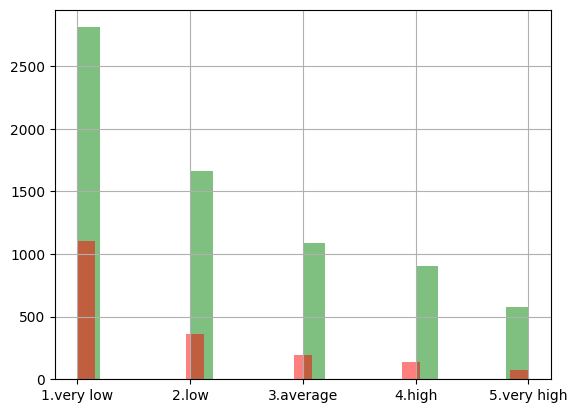

In [ ]:
df['customer_segment'].sort_values().hist(bins='auto', color = 'green', alpha=0.5)
df[df['is_churned'] == 1]['customer_segment'].hist(bins='auto', color = 'red', alpha=0.5)

In [ ]:
display('----------------------------------------------------------')
display('Churned Rate by customer spending group (Customer Segment)')
display('----------------------------------------------------------')

display(f"Segment_very_low: { calculate_percent(df[df['customer_segment'] == '1.very low']):.2f}%")
display(f"Segment_low: { calculate_percent(df[df['customer_segment'] == '2.low']):.2f}%")
display(f"Segment_average: { calculate_percent(df[df['customer_segment'] == '3.average']):.2f}%")
display(f"Segment_high: { calculate_percent(df[df['customer_segment'] == '4.high']):.2f}%")
display(f"Segment_very_high: { calculate_percent(df[df['customer_segment'] == '5.very high']):.2f}%")

'----------------------------------------------------------'

'Churned Rate by customer spending group (Customer Segment)'

'----------------------------------------------------------'

'Segment_very_low: 39.27%'

'Segment_low: 21.54%'

'Segment_average: 18.11%'

'Segment_high: 14.86%'

'Segment_very_high: 13.04%'

# Answer for Q2
As per above analysis with graph and calulation, 'very low' customer segment is hightest churned rate with 39.27% and have observed that the higer the customer spend, the lower chance to be churned.

# Q3. To investigate which kind of recent marketing offers customer like and which kind of offers customer disliked.


Finding the list of recent offers from marketing accepted by customer. Except 'Base Offer', these customer doesn't accept any latestes promotions offers.

In [ ]:
df['Offer'].value_counts()

,count
Offer,
Base Offer,3877
Offer B,824
Offer E,805
Offer D,602
Offer A,520
Offer C,415


Calculation of churned rate by Offers subscription

In [ ]:
display('--------------------------------------------')
display('Churned Rate by Subscription(Offer Accepted)')
display('--------------------------------------------')

display(f"Churned_Base_plan: { calculate_percent(df[df['Offer'] == 'Base Offer']):.2f}%")
display(f"Churned_Offer_A: { calculate_percent(df[df['Offer'] == 'Offer A']):.2f}%")
display(f"Churned_Offer_B: { calculate_percent(df[df['Offer'] == 'Offer B']):.2f}%")
display(f"Churned_Offer_C: { calculate_percent(df[df['Offer'] == 'Offer C']):.2f}%")
display(f"Churned_Offer_D: { calculate_percent(df[df['Offer'] == 'Offer D']):.2f}%")
display(f"Churned_Offer_E: { calculate_percent(df[df['Offer'] == 'Offer E']):.2f}%")

'--------------------------------------------'

'Churned Rate by Subscription(Offer Accepted)'

'--------------------------------------------'

'Churned_Base_plan: 27.11%'

'Churned_Offer_A: 6.73%'

'Churned_Offer_B: 12.26%'

'Churned_Offer_C: 22.89%'

'Churned_Offer_D: 26.74%'

'Churned_Offer_E: 52.92%'

creating histplot for to find performance of Offers. In general, Offer A has the great performance in Churned. Meanwhile, Offer E is the worse.

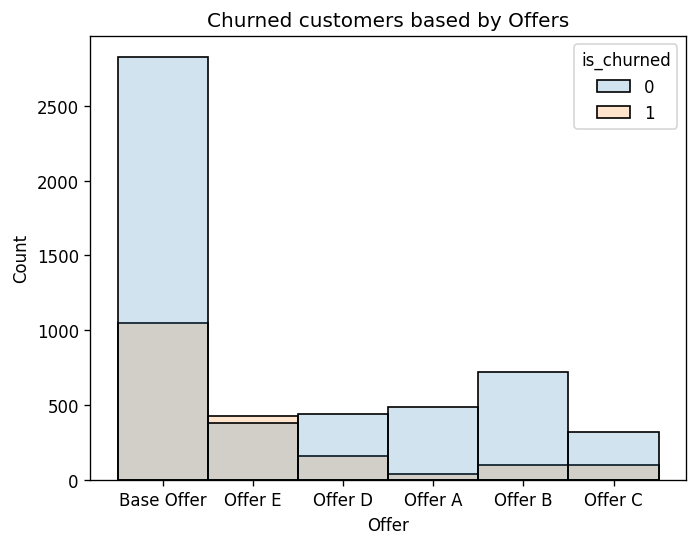

In [ ]:
plt.figure(dpi=120)
sns.histplot(data=df, x='Offer', alpha=0.2, hue='is_churned')
plt.title('Churned customers based by Offers');

# Answer for Q3
As per above analysis, Offers A and B got high retention rate and low churned rate. So, we can assume that customers love these plans. We should continue or create similiar Offers in the future. On the other hand, we should immediately stop running Offer E and creating similiar to Offer is not highly recommended.

# Q4. To identify whether or not the user's age related to churn rate.

Creating histogram to analysis overall customers vs churned customers.

<Axes: >

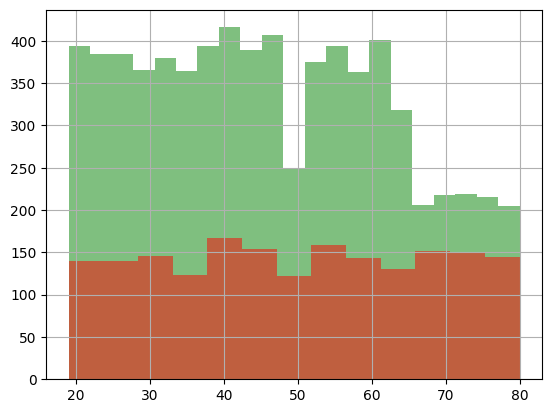

In [ ]:
df['Age'].hist(bins='auto', color = 'green', alpha=0.5)
df[df['is_churned'] == 1]['Age'].hist(bins='auto', color = 'red', alpha=0.5)

Creating the age group

In [ ]:
def age_seperate(age):
  if age < 21:
    return 'Below_20'
  elif age < 41:
    return 'Between_20_40'
  elif age < 61:
    return 'Between_40_60'
  else:
    return 'Above_60'

In [ ]:
df['age_group'] = df['Age'].apply(age_seperate)

In [ ]:
df.groupby(df['age_group'])['Age'].mean()

,Age
age_group,
Above_60,69.317690
Below_20,19.500000
Between_20_40,30.532579
Between_40_60,50.372075


Finding churned rate by age group and can be assumed that above 60 customers has high churned rate with 36.46% meanwhiel below 20 customers have 18.90% churned rate.

In [ ]:
churn_age_group = df[['age_group', 'is_churned']]

display('-------------------------')
display('Churned Rate by Age group')
display('-------------------------')
display(f"Churned_below_20: { calculate_percent(churn_age_group[churn_age_group['age_group'] == 'Below_20']):.2f}%")
display(f"Churned_Between_20_40: { calculate_percent(churn_age_group[churn_age_group['age_group'] == 'Between_20_40']):.2f}%")
display(f"Churned_Between_40_60: { calculate_percent(churn_age_group[churn_age_group['age_group'] == 'Between_40_60']):.2f}%")
display(f"Churned_Above_60: { calculate_percent(churn_age_group[churn_age_group['age_group'] == 'Above_60']):.2f}%")

'-------------------------'

'Churned Rate by Age group'

'-------------------------'

'Churned_below_20: 18.90%'

'Churned_Between_20_40: 23.29%'

'Churned_Between_40_60: 24.10%'

'Churned_Above_60: 36.46%'

Plotting out the Active/Churned customers with age and Revenue. We can see more churned customers above 65 of age.

(0.0, 16000.0)

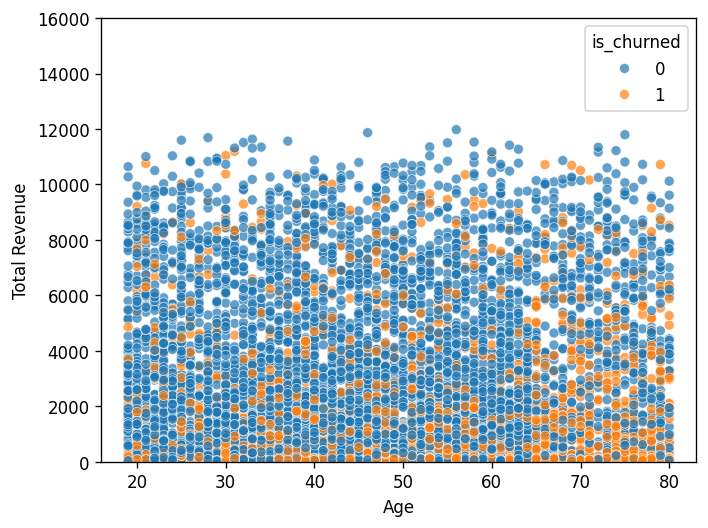

In [ ]:
plt.figure(dpi=120)
sns.scatterplot(data=df, x = 'Age', y='Total Revenue', hue='is_churned', alpha=0.7)
plt.ylim(0,16000)

Finding the average revenue based on age group. The amounts amongs age group are slight varied. However, above 60 is highest spenders.

,Total Revenue
age_group,
Below_20,2869.848307
Between_40_60,2919.456872
Between_20_40,2968.631717
Above_60,3338.206805


<Axes: xlabel='age_group', ylabel='Total Revenue'>

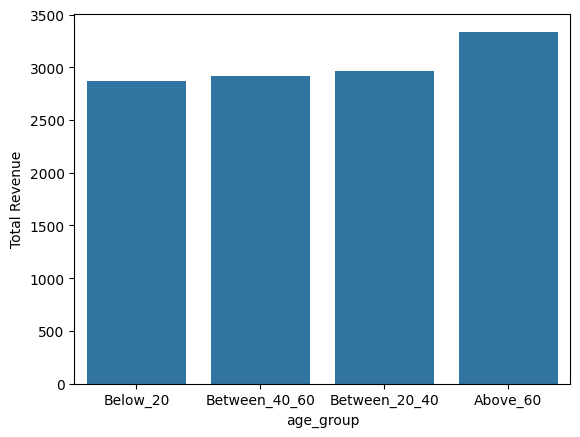

In [ ]:
display(df.groupby(['age_group'])['Total Revenue'].mean().sort_values(ascending=True))
sns.barplot(df.groupby(['age_group'])['Total Revenue'].mean().sort_values(ascending=True))

# Answer for Q4
Since above 60 customers has high churned rate with 36.46% meanwhiel below 20 customers have 18.90% churned rate. We can assumed that age factor has a relations with churned/active customers.

# Q5. To analyse the relations between churned rate vs service duration with the company.


Finding the realations between Total Revenue, Tenture in month and Churned customers. As per below scatterplot, it can be seem that the lower the tenture in months, the higher chance to be churned.

<Axes: xlabel='Tenure in Months', ylabel='Total Revenue'>

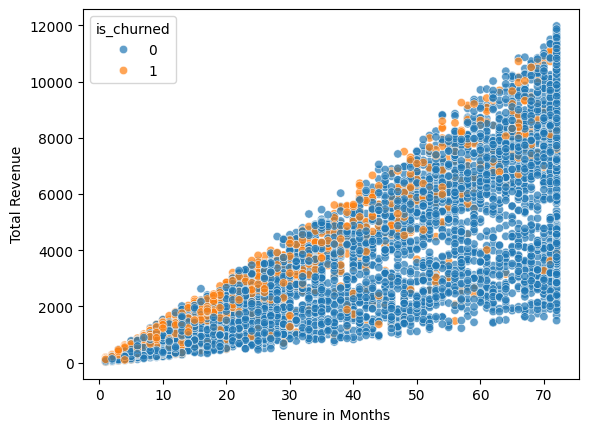

In [ ]:
sns.scatterplot(data=df, x='Tenure in Months', y= 'Total Revenue', hue='is_churned', alpha=0.7)

As per this histrogram, we can clearly seem that less than 10 months customers have highest churned rate.

<Axes: xlabel='Tenure in Months', ylabel='Count'>

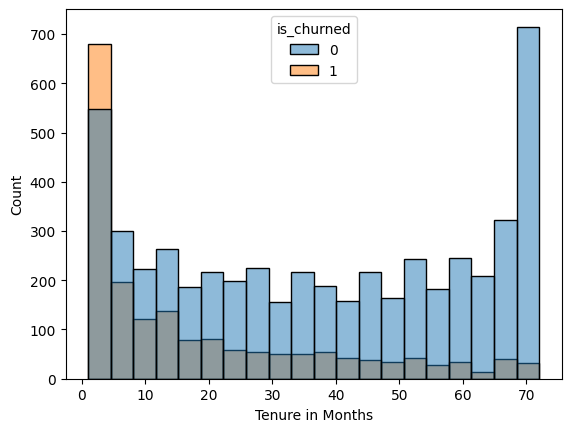

In [ ]:
sns.histplot(data=df[['Tenure in Months','is_churned']], x='Tenure in Months', bins=20, hue='is_churned', alpha=0.5)

# Answer for Q5
We can clearly see that the lesser month in the service has the higher chance to be churned. Additionally, Tenure in Months has negative correlations(-0.352861) with churned customers.

Additional insight from the Churn Category.

In [ ]:
df[df['is_churned'] ==1]['Churn Category'].value_counts() / len(df[df['is_churned'] ==1])

,count
Churn Category,
Competitor,0.449973
Dissatisfaction,0.171750
Attitude,0.168004
Price,0.112895
Other,0.097378


Breakdown into churn details reason

In [ ]:
df[df['is_churned'] ==1].groupby(['Churn Category','Churn Reason'])['Churn Reason'].count()

Churn Category   Churn Reason                             
Attitude         Attitude of service provider                  94
                 Attitude of support person                   220
Competitor       Competitor had better devices                313
                 Competitor made better offer                 311
                 Competitor offered higher download speeds    100
                 Competitor offered more data                 117
Dissatisfaction  Lack of self-service on Website               29
                 Limited range of services                     37
                 Network reliability                           72
                 Poor expertise of online support              31
                 Poor expertise of phone support               12
                 Product dissatisfaction                       77
                 Service dissatisfaction                       63
Other            Deceased                                       6
                 Don't know                                   130
                 Moved                                         46
Price            Extra data charges                            39
                 Lack of affordable download/upload speed      30
                 Long distance charges                         64
                 Price too high                                78
Name: Churn Reason, dtype: int64

Top 5 churn reason

In [ ]:
df[df['is_churned'] ==1]['Churn Reason'].value_counts().sort_values(ascending=False)[0:5]

,count
Churn Reason,
Competitor had better devices,313
Competitor made better offer,311
Attitude of support person,220
Don't know,130
Competitor offered more data,117


Text(0.5, 1.0, 'Churn Reasons Distribution')

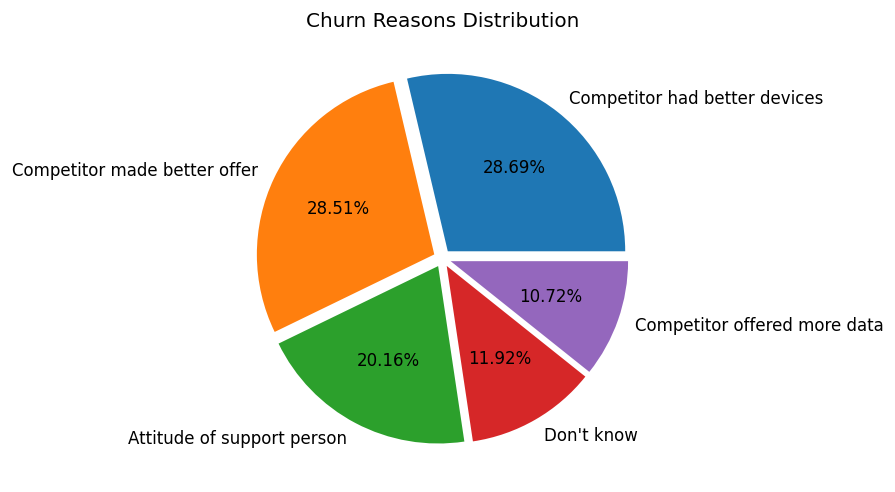

In [ ]:
plt.figure(dpi=120)
keys_rev1 = df[df['is_churned'] ==1]['Churn Reason'].value_counts().sort_values(ascending=False)[0:5].index.to_list()
data_rev1 = df[df['is_churned'] ==1]['Churn Reason'].value_counts().sort_values(ascending=False)[0:5]
plt.pie(data_rev1, labels=keys_rev1,explode=[0.05,0.05,0.05,0.05,0.05], autopct='%.2f%%');
plt.title('Churn Reasons Distribution')

#Conclusion

Overall, we should focus on top 5 churn reasons for next step to make business decision and formulate the customer retention strategy. Especially, reviewing and studying company's offers and devices by comparing with competitors are strongly recommended because this can reduced over 50% of churned if company's offers and devices are more competitive as per market standard. In order to reduce overall 17.24% revenue loss due to customer churned, we can recommended that it can be reduced by immediately stopping Offer E and focus more to create products/offers similiar to Offers A and B which got high retention rate are highly recommended.